# Vision Transformers

copyright 2023, Denis Rothman, MIT License

ViT &  CLIP




In [1]:
#Development access to delete when going into production
from google.colab import drive
drive.mount('/content/drive')

with open('drive/MyDrive/files/github.txt', 'r') as f:
    github_token = f.read().strip()

Mounted at /content/drive


In [2]:
from IPython.display import Image     #This is used for rendering images in the notebook

In [3]:
#Development access to delete when going into production
!curl -H 'Authorization: token {github_token}' -L https://raw.githubusercontent.com/Denis2054/Transformers_3rd_Edition/master/Chapter16/generate_an_image_of_a_car_in_space.jpg --output "generate_an_image_of_a_car_in_space.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32209  100 32209    0     0  71163      0 --:--:-- --:--:-- --:--:-- 71101


In [4]:
from PIL import Image
# Define the path of your image
image_path = "/content/generate_an_image_of_a_car_in_space.jpg"
# Open the image
image = Image.open(image_path)

Copyright 2023 Denis Rothman
The image was generated by a Stable Diffusion Transformer

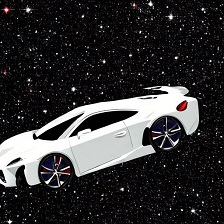

In [5]:
image

#Vision Transformer (ViT)

[Hugging Face Reference](https://huggingface.co/google/vit-base-patch16-224)

## Feature extractor simulator

Displaying patch 1/196


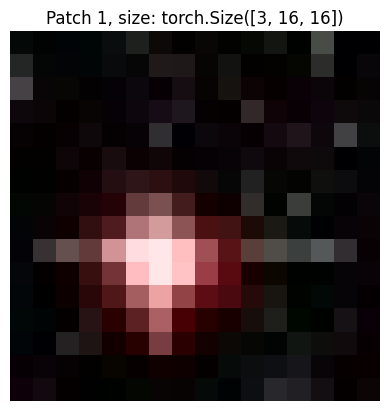

Press Enter to display the next patch (or 'q' to quit)... q


In [6]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224
    transforms.ToTensor()  # Convert the image to a PyTorch tensor
])

# Apply the transformation
pixel_values = transform(image).unsqueeze(0)  # Add an extra dimension for the batch size

patch_size = 16  # change to match the patch size used in your model

# Assuming pixel_values is your input image tensor of shape (batch_size, num_channels, height, width)
patches = pixel_values.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
# patches will now have shape (batch_size, num_channels, num_patches_height, num_patches_width, patch_size, patch_size)

# Reshaping the patches tensor for easy viewing
patches_reshaped = patches.permute(0, 2, 3, 1, 4, 5).contiguous().view(-1, 3, patch_size, patch_size)

# create a transform to convert tensor to PIL Image
to_pil = transforms.ToPILImage()

for i in range(patches_reshaped.size(0)):
    print(f"Displaying patch {i+1}/{patches_reshaped.size(0)}")
    patch_size = patches_reshaped[i].shape
    plt.title(f"Patch {i+1}, size: {patch_size}")
    plt.imshow(to_pil(patches_reshaped[i]))
    plt.axis("off")  # to hide axes
    plt.show()
    userInput = input("Press Enter to display the next patch (or 'q' to quit)... ")
    if userInput.lower() == 'q':
        break

In [7]:
#Uncomment the following command to display the list of pre-installed modules
#!pip list -v

## Installing feature extractor and ViT

In [8]:
!pip install transformers -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.7 MB/s eta 0:00:00


In [9]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## Model prediction

In [10]:
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:",predicted_class_idx,": ", model.config.id2label[predicted_class_idx])

Predicted class: 627 :  limousine, limo


## Configuration and shapes

In [11]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [12]:
print(inputs['pixel_values'].shape)

torch.Size([1, 3, 224, 224])


In [13]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [14]:
print(outputs.logits.shape)

torch.Size([1, 1000])


In [15]:
outputs.logits

tensor([[ 6.2552e-01, -9.8143e-01, -4.9785e-01,  2.6511e-02, -5.4599e-01,
         -3.6269e-02, -3.6015e-01, -5.6295e-01, -1.7574e-01,  2.6453e-01,
          9.5287e-01, -4.8682e-01, -1.7794e-01,  4.5730e-01, -4.6610e-01,
          2.5773e-01, -1.0386e+00, -4.6353e-01,  9.8150e-02,  2.1295e-01,
          6.9664e-01, -8.3763e-01, -7.9977e-01, -1.6137e+00, -2.3889e-01,
          8.7438e-02, -2.9434e-01,  1.0718e-01, -2.1952e-01, -6.5871e-01,
          4.8004e-01, -6.1846e-01, -5.8381e-01, -5.3353e-01, -3.5650e-01,
          4.1239e-01, -1.0090e+00,  2.9561e-02,  3.9894e-01, -1.1910e+00,
         -1.1463e+00, -3.6976e-01, -5.3911e-01, -1.3875e+00, -7.4166e-01,
         -3.8134e-01, -6.1328e-01, -8.5938e-01, -1.5418e+00, -6.3527e-01,
         -1.2243e+00, -4.6312e-02,  1.4071e-01,  5.6486e-01, -7.3335e-01,
         -1.6195e-01, -4.0381e-01, -3.0757e-01, -2.9175e-01, -7.0381e-01,
          9.5711e-01, -1.8762e-01, -7.0864e-02, -4.0758e-01, -1.2576e-01,
         -1.2016e+00, -3.4442e-01,  2.

In [16]:
model.config.id2label

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [17]:
import torch
import pandas as pd

# Apply softmax to convert logits to probabilities
probs = torch.nn.functional.softmax(logits, dim=-1)

# Get the top 5 predicted class probabilities and their corresponding indices
top_5_probs, top_5_labels = torch.topk(probs, 5)
top_5_probs = top_5_probs.detach().cpu().numpy()
top_5_labels = top_5_labels.detach().cpu().numpy()

# Get the mapping from IDs to labels
id2label = model.config.id2label

# Create a dictionary that maps the top 5 predictions to their corresponding labels and probabilities
pred_dict = {"Index": [], "Probability": [], "Label": []}
for i in range(5):
    pred_dict["Index"].append(top_5_labels[0][i])
    pred_dict["Probability"].append(top_5_probs[0][i])
    pred_dict["Label"].append(id2label[top_5_labels[0][i]])

# Convert the dictionary to a DataFrame
pred_df = pd.DataFrame(pred_dict)

# Display the DataFrame
pred_df

,Index,Probability,Label
0,627,0.848520,"limousine, limo"
1,436,0.043924,"beach wagon, station wagon, wagon, estate car,..."
2,817,0.033518,"sports car, sport car"
3,479,0.027506,car wheel
4,751,0.015660,"racer, race car, racing car"


![](http://images.cocodataset.org/val2017/000000039769.jpg)



# CLIP

Reference: https://github.com/openai/CLIP


In [18]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.4 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-l8wz9cou
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-l8wz9cou
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369498 sha256=d227d00878f6038b91ddb7b7a0140608698ec6ec5190634b50eba9042b4d9709
  Stored in directory: /tmp/pip-ephem-wheel-cache-qeh1h6e_/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [19]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100

In [20]:
#@title Select an image index between 0 and 9999
index =   15#@param {type: "number"}

if index > 9999 or index <0:
  print("Select a index between 0 and 9999")
  print("The default index is 15")
  index=15

## Load preprocessor and model

In [21]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
image, class_id = cifar100[index]
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 74.4MiB/s]


100%|██████████| 169001437/169001437 [00:10<00:00, 15698813.39it/s]


Extracting /root/.cache/cifar-100-python.tar.gz to /root/.cache


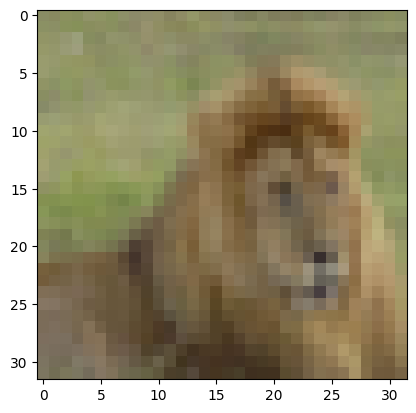

In [22]:
import matplotlib.pyplot as plt
from torchvision import transforms
plt.imshow(image)

In [23]:
# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

            lion: 96.29%
           tiger: 1.07%
           camel: 0.29%
      lawn_mower: 0.27%
         leopard: 0.26%


In [24]:
cifar100.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [25]:
indices

tensor([43, 88, 15, 41, 42], device='cuda:0')

In [26]:
values

tensor([0.9629, 0.0107, 0.0029, 0.0027, 0.0026], device='cuda:0',
       dtype=torch.float16)

In [27]:
values*100

tensor([96.3125,  1.0693,  0.2925,  0.2664,  0.2620], device='cuda:0',
       dtype=torch.float16)